# Boosting!

Es un tipo de algoritmo de ensamble (paralelo, secuenciales o heterogeneo!). En especifico, es un modelo secuencial.

Los modelos secuenciales constiten en generar modelos iniciales, que a lo largo de las iteraciones mejoran los errores previos.

- No existe un algoritmo que pueda resolver todos los problemas vistos!

Existen:

- Adaptive Boosting
- Gradient Boosting

Existe un clasificador debil (que es poco optimo para hacer regresiones/clasificaciones, pero mejor que un clasificador aleatorio!)

# Adaptive Boosting (ADABoost)

Fue el primer tipo de ensamble secuencial.

- Es resistente al overfit
- Mientras mas se haga boosting, mejor sera la validacion del modelo en el conjunto de validacion

## Mecanismo de Accion

Comienza con un conjunto de datos, donde al obtener una muestra, la seleccion de estas son equiprobables. Por ejemplo, sacar las caras de un dado puede ser equiprobable!. Estas probabilidades son asignada como pesos a cada dato de una muestra!

1. Seleccionamos un conjunto de datos para hacer un modelo
2. Hacemos la primera iteracion de un modelo
3. Calculamos la tasa de error en las **clasificaciones incorrectas**
4. Se recalculan las ponderaciones/probabilidades/pesos para los datos de la muestra. En este caso, aumenta la probabilidad de que se saquen los datos en donde el modelo se equivoco mas.
5. Luego, se vuelve a hacer la seleccion de los datos, pero basado en los pesos nuevos calculados!

Esto se itera N veces, y al momento de predecir, se toma en cuenta a todos los modelos hechos previamente!

No se ocupa mucho :(

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import lec9_graphs as afx

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

In [13]:
df = pd.read_csv('spamdata_esl_colnames.csv').drop(columns='Unnamed: 0')

Con sweetviz/pandas profiling se puede hacer un analisis de datos exploratorio automatizado!

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns='spam')
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [23]:
modelo_naive = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
modelo_boosteado = AdaBoostClassifier(base_estimator=modelo_naive, random_state=1).fit(X_train, y_train)

- Al final en el booster se le pasa un modelo debil (un modelo que tenga un poder predictivo medio malo). Luego se hace el boosting (aunque en la practica solamente se hace el ada boost!)

In [24]:
yhat_naive = modelo_naive.predict(X_test)
yhat_boosted = modelo_boosteado.predict(X_test)

print(classification_report(y_test, yhat_naive))
print(classification_report(y_test, yhat_boosted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       906
           1       0.89      0.89      0.89       613

    accuracy                           0.91      1519
   macro avg       0.91      0.91      0.91      1519
weighted avg       0.91      0.91      0.91      1519

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       906
           1       0.96      0.93      0.94       613

    accuracy                           0.96      1519
   macro avg       0.96      0.95      0.95      1519
weighted avg       0.96      0.96      0.96      1519



Entonces, se puede ver que aumenta el desempeno!

In [36]:
resultados = []

for i, modelo in enumerate(modelo_boosteado.estimators_):
    resultados.append(accuracy_score(y_test, modelo.predict(X_test)))

<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=1791095845)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=2135392491)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=946286476)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=1857819720)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=491263)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=550290313)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=1298508491)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=2143362693)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=630311759)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=1013994432)>
<bound method ClassifierMixin.score of DecisionTreeClassifier(random_state=396591248)>
<bound method ClassifierMixin.score of D

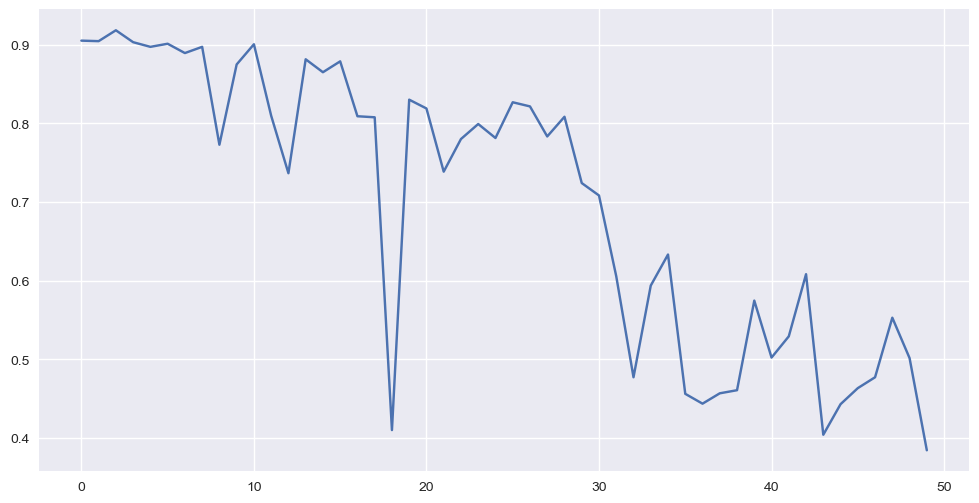

In [34]:
plt.plot(resultados)

# Gradient Boosting

- Este boosting entrena en funcion al error ponderado del modelo anterior.
- Se necesita una funcion de perdida (o de error). El error cuadratico medio es una funcion de perdida.
- En el gradient boosting se quiere MINIMIZAR la funcion de perdida

Ej: Arbol 1: RMSE 100 -> Arbol 2: RMSE 60 -> ... RMSE min!

## Mecanismo de Accion

1. Se selecciona la cantidad de iteraciones a hacer! (Ej: Hacer 50 iteraciones de mejora, hacer 2000 iteraciones para mejorar el modelo)

    1. Se entrena un modelo
    2. Se calcula su funcion de error
    3. Luego, calcula el gradiente o el cambio en el punto del error obtenido
    4. Identifica en que direccion del gradiente puedo minimizar el error
    5. Modifico los pesos de cada una de las variables para ir hacia este error
    6. Itero, y lo hago segun el learning_rate

- Ahora, con el **learning_rate** se cambia el tamano de los pasos que se dan al momento de seguir el gradiente!. Si el learning_rate es demasiado alto, entonces el modelo tiende a ser menos estable con el error calculado. Sin embargo, si el learning_rate es demasiado bajo, entonces es posible que nos quedemos en minimos locales y nunca encontremos el error mas bajo :(.

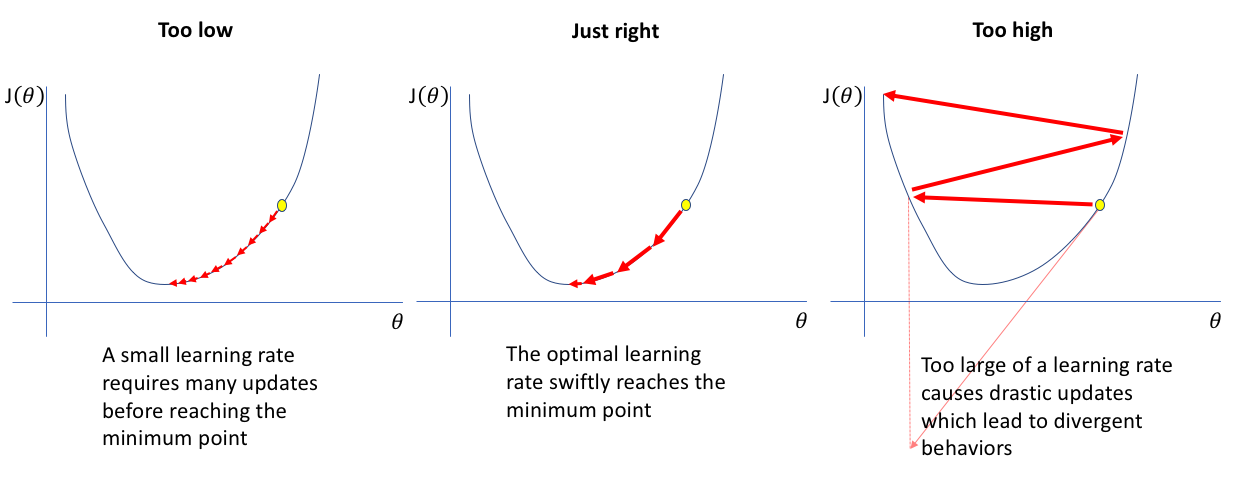

En este caso, la curva es la curva de la funcion error

- Al final, se utiliza un arbol de error, y un arbol que predice el error! Y asi se va iterando hacia el gradiente

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
modelo_gradiente = GradientBoostingClassifier().fit(X_train, y_train)

Aqui se ve todo de la optimizacion de los gradient boosting, como con el learning_rate o subsample. Pero la verdad es que no entendi mucho...